## Logistic Regression from scratch (Binary Classification)
Implementation of Logistic Regression for Binary Classification using Gradient Descent.

#### Sources:

[Cost Function and Gradient Descent](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)


#### Optimization algorithms:
[[advanced-optimization]](https://www.coursera.org/learn/machine-learning/lecture/licwf/advanced-optimization)
- Gradient descent
- Conjugate gradient
- BFGS
- L-BFGS


#### Useful Links:

[Logistic regression (binary) - computing the gradient](https://www.youtube.com/watch?v=hWLdFMccpTY)


### Notes

add accuracy

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Markdown as md, Image
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression

prng = RandomState(10)

### Hypothesis function

Logistic Regression hypothesis function is defined as:

$$h_\theta(x) = g(z),$$

where function g is the Sigmoid function and is defined as:

$$g(z)= \frac{1}{1+e^{-z}},$$

and 

$$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta^TX$$

### Sigmoid function - Implementation

In [2]:
def sigmoid_function(z):
    """
    Applies sigmoid function to an integer or an array
    
    Params:
        z (int or array)
    """
    return 1/(1+(np.exp(-z)))



### Sigmoid function - Properties
[[decision-boundary]](https://www.coursera.org/learn/machine-learning/supplement/N8qsm/decision-boundary)

$$z = 0 \implies e^{-z} = 1 \implies  g(z) \rightarrow 0.5$$

$$z \rightarrow \infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 1$$

$$z \rightarrow -\infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 0$$

### Test Sigmoid Function

In [3]:
print('z=0, g(z) = {}'.format(sigmoid_function(0)))
print('z=20, g(z) = {}'.format(sigmoid_function(20).round(8)))
print('z=-20, g(z) = {}'.format(sigmoid_function(-20).round(8)))

z=0, g(z) = 0.5
z=20, g(z) = 1.0
z=-20, g(z) = 0.0


### Vectorised Cost Function:
[[cost-function]](https://www.coursera.org/learn/machine-learning/supplement/bgEt4/cost-function)

We will try to minimise the cost function. The vectorised form of Cost Function is:

$$J(\theta) = \frac{1}{m} (-y^{T}log(h) - (1-y)^{T}log(1-h)),$$

where h is is the hypothesis function in vectorised form,
$$h=g(X\theta).$$

In [4]:
def cost_function(x, y, theta):
    """
    Returns the cost for given x, y, and theta.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    
    c1 = -y.T @ np.log(h)
    c2 = (1-y).T @ np.log(1-h)
    
    J = (1/m) * ( c1 - c2 )
    
    return J[0, 0]



### Gradient Descent:
[[gradient-descent]](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)

We will use Gradient Descent to minimise the cost function.

General form of gradient descent:

$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta),$$

repeat until convergence.

Vectorised implementation after working out the partial derivatives:

$$\theta := \theta - \frac{\alpha}{m} X^T(g(X\theta) - y)$$


In [100]:
def gradient_descent(x, y, theta, alpha=0.01):
    """
    Returns coefficients (theta) by performing one step
    of gradient descent.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
        
        alpha (float): Learning rate for gradient descent
            algorithm
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    errors = h - y
    theta = theta - ((alpha/m) * (x.T @ errors))
    return theta
    

In [101]:
def fit(x, y, alpha=0.01, steps=1000):
    m = y.shape[0]
    x = np.append(np.ones((m, 1)), x, axis=1)
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
    
    costs = []
    for _ in range(steps):
        theta = gradient_descent(x, y, theta, alpha)
        cost = cost_function(x, y, theta)
        costs.append(cost)
    return {'costs': costs, 'theta': theta}


### Testing implementation

In [102]:
df = pd.read_csv('./data/ex2data1.txt', header=None, names=['x1', 'x2', 'y'])

x = df[['x1', 'x2']].to_numpy()
y = df[['y']].to_numpy()


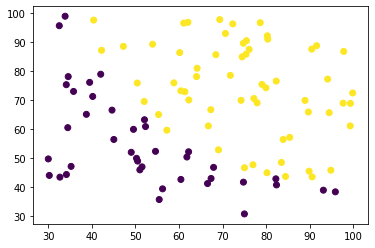

In [103]:
plt.scatter(df['x1'], df['x2'], c=df['y']);

In [104]:
alpha = 0.0009
steps = 200000

result = fit(x, y, alpha=alpha, steps=steps)

costs, theta = result['costs'], result['theta']

In [105]:
print('theta_0 = %s'%theta[0, 0], 'theta_1 = %s'%theta[1, 0], 'theta_2 = %s'%theta[2, 0], sep='\n')

theta_0 = -7.010230917814085
theta_1 = 0.06209394526734941
theta_2 = 0.0555120261194164


### Convergence Test

Cost values should always decrease on every itteration, if not then we may have to adjust (lower) our learning rate, alpha.

In [106]:
def check_cost(costs):
    """
    Checks if the cost is always decreasing.
    """
    for i in range(len(costs)-1):
        if costs[i] < costs[i+1]:
            print('error: cost increased at step: {}\nDecrease your learning rate...'.format(i+1))
            return 
        
    print("alpha seems to be low enough for gradient descent algorithm to converge to minimum.")
        

In [107]:
check_cost(costs)

alpha seems to be low enough for gradient descent algorithm to converge to minimum.


### Cost by itterations

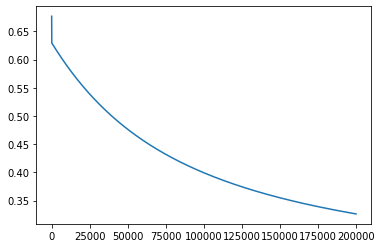

In [108]:
plt.plot(costs);

### Plot the hypothesis (Boundry) line

Since we only have two features $x_1$ and $x_2$, we can plot one as a function of another on a 2D graph:

$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$

We want to plot $x_2$ as a function of $x_1$, hence rearranging for $x_2$, we get:

$$x_2 = -\frac{1}{\theta_2}(\theta_0 + \theta_1x_1)$$

Let $\theta \setminus \theta_2$ be a column vector with all values of $\theta$ except $\theta_2$, then the Vectorised form is:

$$x_2 = -\frac{1}{\theta_2}X\theta \setminus \theta_2$$


In [109]:
def plot(x, y, theta):
    x1_plot = np.linspace(x[:, 0].min(), x[:, 1].max())[:, np.newaxis]
    ones = np.ones((x1_plot.shape[0], 1))

    x1 = np.append(ones, x1_plot, axis=1)
    x2_plot = -(1/theta[2, 0]) * x1 @ theta[:2, :]

    plt.scatter(x[:, 0], x[:, 1], c=y);
    plt.plot(x1_plot[:, 0], x2_plot[:, 0])

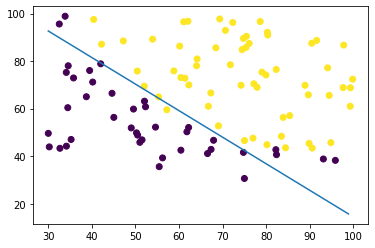

In [110]:
plot(x, y, theta)

### Model Accuracy

We need to convert the probabilities into binary values to get y:

\begin{equation}
  y =
    \begin{cases}
      0 & \text{if $h_{\theta}(x) <= 0.5$}\\
      1 & \text{otherwise}
    \end{cases}       
\end{equation}

In [111]:
def get_accuracy(x, y, theta):
    
    m = y.shape[0]
    x = np.append(np.ones((m, 1)), x, axis=1)
    h = sigmoid_function(x @ theta)
    
    y_pred = np.round(h)

    return (y_pred == y).sum()
    

In [114]:
print('Model Accuracy: {}%'.format(get_accuracy(x, y, theta)))

Model Accuracy: 93%


### Logistic Regression using Sklearn

This serves as a benchmark.

In [93]:
model = LogisticRegression()
model.fit(x, y[:, 0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
theta = np.append(model.intercept_, model.coef_)[:, np.newaxis]
theta

array([[-25.05219314],
       [  0.20535491],
       [  0.2005838 ]])

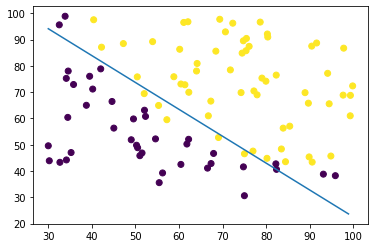

In [95]:
plot(x, y, theta)

In [263]:
model.score(x, y)

0.89

## Optimizing Gradient Descent

We will implement [feature scaling](https://www.coursera.org/learn/machine-learning/supplement/CTA0D/gradient-descent-in-practice-i-feature-scaling) so that the theta values converge faster to global minimum in our gradient descent algorithm.

### Feature Scaling

Gradient Descent converges faster to global minimum if we scale our features.

#### Optimum theta values

We know the optimium theta values from running Logistic Regression on Sklearn:

\begin{equation}
\theta \approx
    \begin{bmatrix}
    -25.05219314\\
    0.20535491\\
    0.2005838
\end{bmatrix}
\end{equation}

#### Theta values from our implementation

We can see that the theta values in our implementation are converging towards the optimum theta values. However, after 200,000 steps, our values are still not close enough to the optimum:

\begin{equation}
\theta \approx
    \begin{bmatrix}
-7.0102\\
0.0621\\
0.0555\
\end{bmatrix}
\end{equation}

We need features' values $x_i$ to be approximetely between -1 and 1 i.e. $-1 <=x_{i} <= 1$, but not too small either. Ideally, we would like:

$$0.3 <= |x_{i}| <= 3$$

#### Mean Normalization

We can use mean normalization to get feature values on the same scale:

$$ x_{i} := \frac{x_{i} - \mu_{i}}{s_{i}},$$

where $\mu_i$ is the mean of all values of feature i, and $s_{i}$ is range of values (max - min) or standard deviation.

In [143]:
def feature_normalize(x):
    """
    Normalizes all feature values.
    """
    means = x.mean(axis=0)
    stds = x.std(axis=0)
    
    for i in range(x.shape[1]):
        x[:, i] = (x[:, i] - means[i])/stds[i]
        
    return x
    

In [179]:
def fit(x, y, alpha, steps=100):

    # Normalize features
    x = feature_normalize(x)

    m = y.shape[0]
    x = np.append(np.ones((m, 1)), x, axis=1)
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
    
    costs = []
    for _ in range(steps):
        theta = gradient_descent(x, y, theta, alpha)
        cost = cost_function(x, y, theta)
        costs.append(cost)
    return {'costs': costs, 'theta': theta}


In [257]:
alpha = 0.001
steps = 50000

result = fit(x, y, alpha=alpha, steps=steps)

costs, theta = result['costs'], result['theta']

In [258]:
check_cost(costs)

alpha seems to be low enough for gradient descent algorithm to converge to minimum.


In [259]:
print('theta_0 = %s'%theta[0, 0], 'theta_1 = %s'%theta[1, 0], 'theta_2 = %s'%theta[2, 0], sep='\n')

theta_0 = 1.003831551801409
theta_1 = 2.490424429492739
theta_2 = 2.2769466811539005


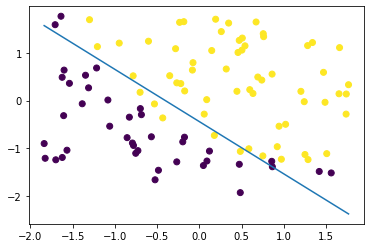

In [260]:
plot(x, y, theta)

In [261]:
print('Model Accuracy: {}%'.format(get_accuracy(x, y, theta)))

Model Accuracy: 89%


#### Check theta values using Sklearn

In [262]:
model = LogisticRegression()
model.fit(x, y[:, 0])
theta = np.append(model.intercept_, model.coef_)[:, np.newaxis]
theta

array([[1.00244111],
       [2.28481793],
       [2.09157835]])

In [267]:
print('Sklearn model accuracy: {:.0%}'.format(model.score(x, y)))

Sklearn model accuracy: 89%


## Regularized Logistic Regression

[Overfitting](https://www.coursera.org/learn/machine-learning/supplement/VTe37/the-problem-of-overfitting) can occur if there are too many features in our dataset. One way to deal with overfitting is to use [regularization](https://www.coursera.org/learn/machine-learning/supplement/v51eg/regularized-logistic-regression).


#### Lasso (L1) and Ridge (L2) Regularization Methods
https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c


We will be implementing L2 Regularization method, also known as Ridge Regression.


#### Normalizing for Regularization
Features are usually [normalized](https://stats.stackexchange.com/a/195391) before applying Lasso or Ridge Regression.


### Adding Regularization:
To implement regularization, we must add the regularization terms to:
- **Cost function**
- **Gradient Descent Algorithm**

### Regularized Cost Function

https://www.coursera.org/learn/machine-learning/supplement/1tJlY/cost-function

#### Cost function with Regularization:

<img src="./images/regularized-cost-function.png" width="600"> 

In [20]:
def cost_function_L2(x, y, theta, l):
    """
    Returns the cost for given x, y, and theta.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
        
        l (float): Regularization term for Ridge regression
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    
    c1 = -y.T @ np.log(h)
    c2 = (1-y).T @ np.log(1-h)
    
    J = (1/m) * ( c1 - c2 )
    
    regularization_term = ( l/(2*m) ) * theta[1:, :].sum()
    
    J = J[0, 0] + regularization_term
    
    return J



### Regularized Gradient Descent Algorithm

The derivative part of Gradient Descent algorithm:

<img src="./images/regularized-gradient-descent-j0.png" width="400"/>

<img src="./images/regularized-gradient-descent-jn.png" width="400"/>

#### Vectorised implementation

$$\theta_0 := \theta_0 - \frac{\alpha}{m} X_1^T(g(X\theta) - y)$$

$$\theta_j := \theta_j(1 - \alpha \frac{\lambda}{m}) - \frac{\alpha}{m} X_j^T(g(X\theta) - y),$$

where $X_1$ is a column vector with the first column of X and $X_j$ is a matrix with all columns of X except the first.

In [21]:
def gradient_descent_L2(x, y, theta, alpha, l):
    """
    Returns coefficients (theta) by performing one step
    of gradient descent.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
        
        alpha (float): Learning rate for gradient descent
            algorithm
    
        l (float): lambda value for regularization
        
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    errors = h - y
    
    theta_0 = theta[0, 0].copy()
    theta_j = theta[1:, :].copy()
    
    # No regularization for theta_0
    theta_0 = theta_0 - ((alpha/m) * (x[:, 0][:, np.newaxis].T @ errors))
    
    # regulartization term
    r = 1 - (alpha * l/m)
    
    tmp_derivative = ( (alpha/m) * (x[:, 1:].T @ errors) )
    
    # Update theta_1, theta_2, ..., theta_n
    theta_j = (theta_j * r) - tmp_derivative
    
    # append theta0 and thetaj values
    theta = np.append(theta_0, theta_j, axis=0)
    
    return theta
    

In [268]:
def fit_L2(x, y, alpha, l, steps=100):
    m = y.shape[0]
    
    x = feature_normalize(x)
    x = np.append(np.ones((m, 1)), x, axis=1)
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
    
    costs = []
    for _ in range(steps):
        theta = gradient_descent_L2(x, y, theta, alpha, l)
        cost = cost_function_L2(x, y, theta, l)
        costs.append(cost)
        
    return {'costs': costs, 'theta': theta}


In [296]:
alpha = 10e-12
steps = 10000
l = 10

result = fit_L2(x, y, alpha=alpha, l=l, steps=steps)
costs, theta = result['costs'], result['theta']

In [297]:
print('theta_0 = %s'%theta[0, 0], 'theta_1 = %s'%theta[1, 0], 'theta_2 = %s'%theta[2, 0], sep='\n')

theta_0 = 9.999999875012498e-09
theta_1 = 2.8122913048398098e-08
theta_2 = 2.5098614162631098e-08


In [298]:
check_cost(costs)

alpha seems to be low enough for gradient descent algorithm to converge to minimum.


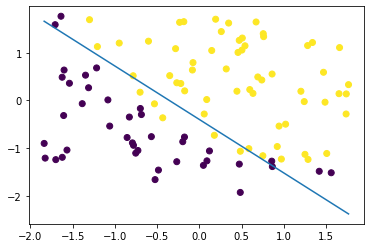

In [299]:
plot(x, y, theta)

In [286]:
print('Model Accuracy: {}%'.format(get_accuracy(x, y, theta)))

Model Accuracy: 90%


In [287]:
10e-3

0.01

In [26]:
# df = pd.read_csv('./data/ex2data2.txt', header=None, names=['x1', 'x2', 'y'])

# x = df[['x1', 'x2']].to_numpy()
# y = df[['y']].to_numpy()

In [27]:
# plt.scatter(df['x1'], df['x2'], c=df['y']);

In [28]:
# alpha = 0.0004
# steps = 500000
# result = fit(x, y, alpha=alpha, steps=steps)

In [29]:
# costs, theta = result['costs'], result['theta']

# check_cost(costs)

In [30]:
# plt.plot(costs);

In [31]:
# print('theta_0 = %s'%theta[0, 0], 'theta_1 = %s'%theta[1, 0], 'theta_2 = %s'%theta[2, 0], sep='\n')

#### Overfitting problem






#### Regularized Logistic Regression
https://www.coursera.org/learn/machine-learning/supplement/v51eg/regularized-logistic-regression

#### Regularized Linear Regression
https://www.coursera.org/learn/machine-learning/supplement/pKAsc/regularized-linear-regression